In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [3]:
path= r'C:\Users\HP\OneDrive\Bureau\Portfolio Projects\Housing Price Prediction\Data\Housing.csv'
df= pd.read_csv(path)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Cleaning 


In [4]:
#Removing Duplicate
# Handling missing Values if exist 
df.drop_duplicates()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Data Visualisation

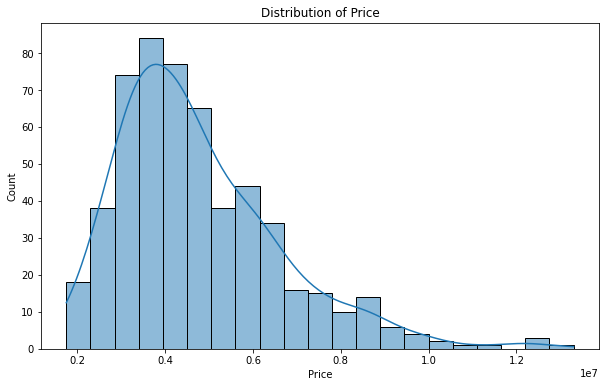

In [7]:
#Distribution of the price using hist plot

plt.figure(figsize=(10, 6))
sns.histplot(df["price"], kde=True)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Price")
plt.show()





The resulting plot provides insights into the distribution of prices in the dataset.

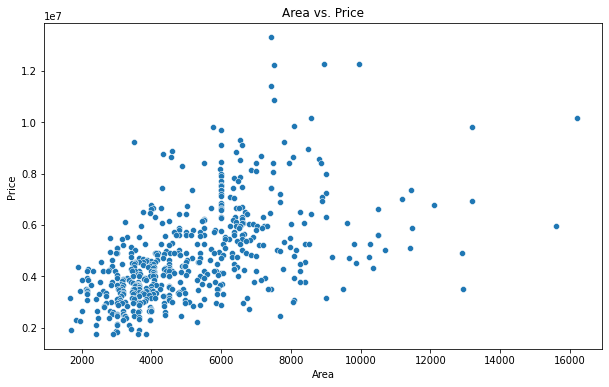

In [8]:
#create a scatter plot comparing the "Area" and "Price" variables,

plt.figure(figsize=(10, 6))
sns.scatterplot(x="area", y="price", data=df)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs. Price")
plt.show()

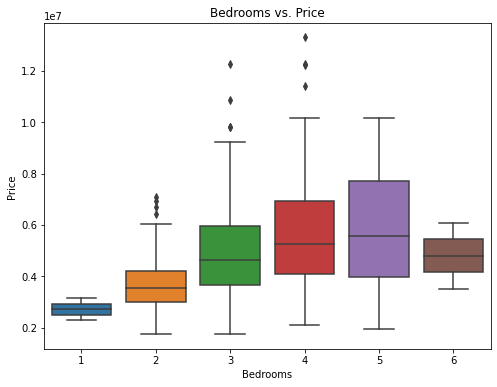

In [9]:
##create a boxplot comparing the "bedrooms" and "Price" variables
plt.figure(figsize=(8, 6))
sns.boxplot(x="bedrooms", y="price", data=df)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs. Price")
plt.show()

This visualisation generates a boxplot that compares the "bedrooms" and "Price" variables. The resulting plot provides insights into the distribution of prices across different bedroom categories, allowing for comparisons and identification of potential outliers or variations in prices based on the number of bedrooms.

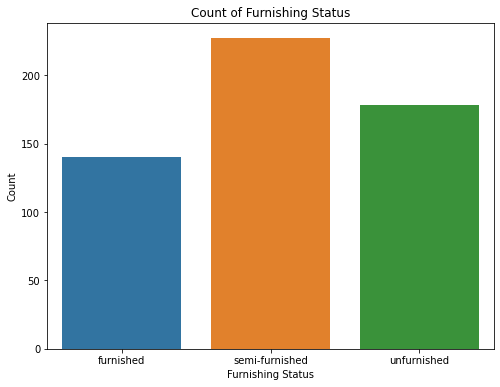

In [10]:
#creates a count plot using seaborn (sns) to compare the frequency or count of different categories within the "furnishingstatus" variable in the DataFrame

plt.figure(figsize=(8, 6))
sns.countplot(x="furnishingstatus", data=df)
plt.xlabel("Furnishing Status")
plt.ylabel("Count")
plt.title("Count of Furnishing Status")
plt.show()


Furnishing Status Categories: The x-axis of the count plot represents the different categories within the "furnishingstatus" variable. Each category represents a specific furnishing status, such as "Fully Furnished," "Semi-Furnished," or "Unfurnished."

Count of Observations: The y-axis represents the count or frequency of occurrences for each furnishing status category. The height of each bar in the plot corresponds to the number of observations falling into that specific furnishing status category.

Comparison of Furnishing Status: The count plot allows for a visual comparison of the frequency of different furnishing status categories. You can observe which furnishing status category has the highest count or is the most prevalent in the dataset.

Insights into Furnishing Status Distribution: The count plot helps to understand the distribution of the furnishing status variable. It provides information about the relative abundance or scarcity of each furnishing status category within the dataset.

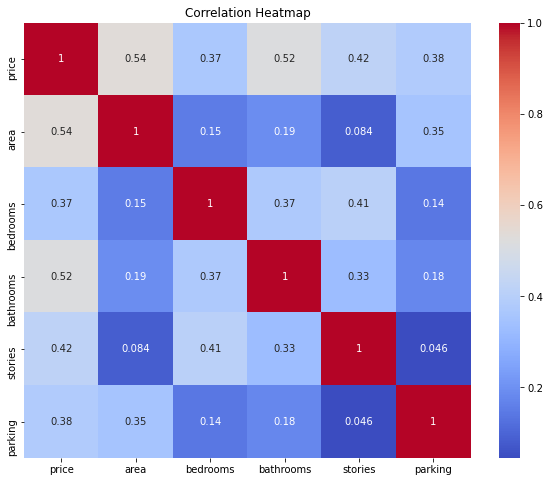

In [11]:
# creates a correlation heatmap using seaborn (sns) to visualize the correlation between variables in the DataFrame

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

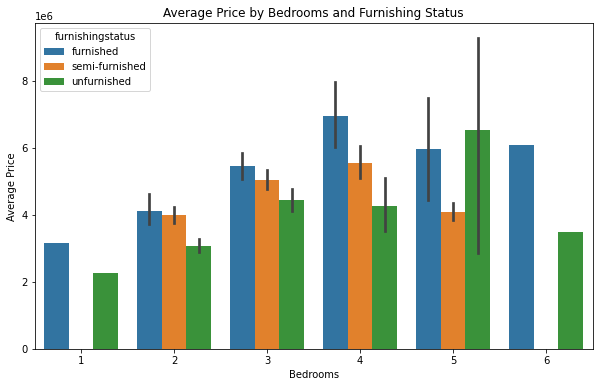

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x="bedrooms", y="price", hue="furnishingstatus", data=df)
plt.xlabel("Bedrooms")
plt.ylabel("Average Price")
plt.title("Average Price by Bedrooms and Furnishing Status")
plt.show()

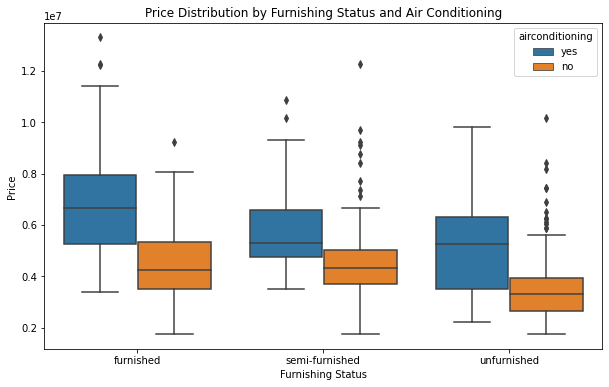

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="furnishingstatus", y="price", hue="airconditioning", data=df)
plt.xlabel("Furnishing Status")
plt.ylabel("Price")
plt.title("Price Distribution by Furnishing Status and Air Conditioning")
plt.show()

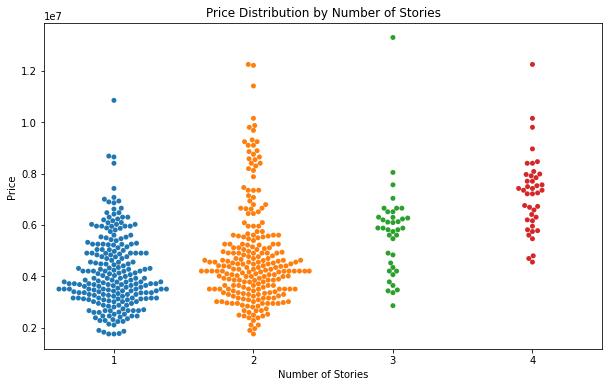

In [14]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x="stories", y="price", data=df)
plt.xlabel("Number of Stories")
plt.ylabel("Price")
plt.title("Price Distribution by Number of Stories")
plt.show()

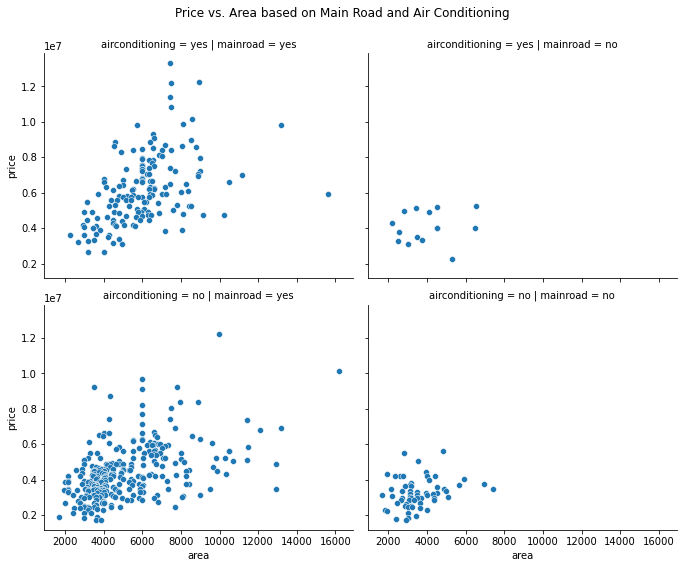

In [15]:
g = sns.FacetGrid(df, col="mainroad", row="airconditioning", height=4, aspect=1.2)
g.map(sns.scatterplot, "area", "price")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Price vs. Area based on Main Road and Air Conditioning")
plt.show()

### Step 3: Data Preparation

In [16]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

furnishing_status_ohe = pd.get_dummies(df['furnishingstatus'], prefix='furnishing')
df = pd.concat([df, furnishing_status_ohe], axis=1)
df.drop('furnishingstatus', axis=1, inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_furnished,furnishing_semi-furnished,furnishing_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [17]:
X = df.drop('price', axis=1)  
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
   
}

In [31]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','Gradient Boosting Regressor' ,'K Neighbors Regressor','Linear SVR'
]
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 1754318687330.6628
Mean Absolute Error (MAE): 970043.4039201637
R-squared Score: 0.6529242642153186

Results for Decision Tree:
Mean Squared Error (MSE): 2912271844036.6973
Mean Absolute Error (MAE): 1240027.5229357798
R-squared Score: 0.42383393600393715

Results for Random Forest:
Mean Squared Error (MSE): 1942994515131.6985
Mean Absolute Error (MAE): 1021500.7993883793
R-squared Score: 0.6155964957592528

Results for SVR:
Mean Squared Error (MSE): 5567932621241.873
Mean Absolute Error (MAE): 1763890.3374061887
R-squared Score: -0.10156400047103098

Results for Gradient Boosting Regressor:
Mean Squared Error (MSE): 1686414164366.9026
Mean Absolute Error (MAE): 965758.2931306245
R-squared Score: 0.6663585463904778

Results for K Neighbors Regressor:
Mean Squared Error (MSE): 3204590217981.6514
Mean Absolute Error (MAE): 1294768.8073394496
R-squared Score: 0.36600144784028377

Results for Linear SVR:
Mean Squared Error (MSE): 386

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The model with the highest R-squared score is the Gradient Boosting Regressor, indicating it explains the most variance in the dependent variable and provides a better fit compared to other models.

Based on these results, the Gradient Boosting Regressor appears to be the best-performing model among the ones evaluated, as it has the lowest MSE, the lowest MAE, and the highest R-squared score.

In [32]:
accuracy

[0.6529242642153186,
 0.42383393600393715,
 0.6155964957592528,
 -0.10156400047103098,
 0.6663585463904778,
 0.36600144784028377,
 0.2362768942833987]

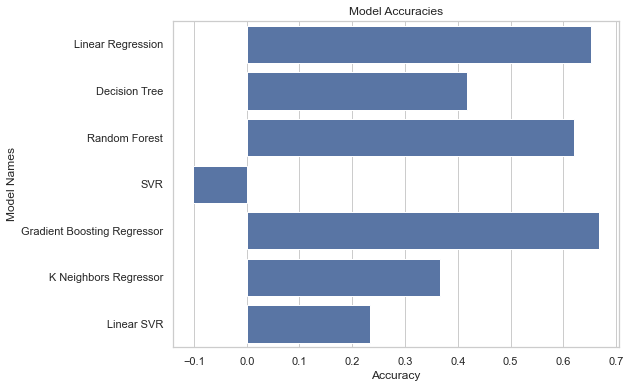

In [30]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="b")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()

In [36]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_test_pred

array([ 4502828.37181574,  7301497.91956791,  3697701.59005787,
        4415743.20542514,  3722737.24968507,  3865550.49614501,
        6136214.06871467,  5791540.28823292,  3134157.53152718,
        3114435.19418442, 12137826.41591078,  2882584.0837702 ,
        3208316.02923451,  3522704.92668211,  3435485.80022381,
        4069123.55645549,  3098552.12033574,  5415014.41266069,
        4439493.5514427 ,  4418312.79906157,  5707424.72700222,
        6035433.00804607,  2882584.0837702 ,  4289800.91386485,
        4561477.91842396,  6821376.76734597,  3692150.03377472,
        4693525.46680212,  6977182.97522104,  3401612.97198518,
        5666391.81846931,  3390381.12480554,  6739563.33216028,
        4337672.03211353,  3390928.33686092,  6291090.87814363,
        4867167.18839566,  3723546.20462899,  2895001.3160907 ,
        4118664.03662684,  4493358.06656763,  3102072.89396866,
        7301497.91956791,  4325436.95301591,  4003794.14412155,
        4013291.29174847,  7194359.52580

In [48]:
predictions_df = pd.DataFrame({'Price': y_test,'Predicted Price': y_test_pred})
predictions_df = predictions_df.sort_values(by='Predicted Price', ascending=False)
# Display the DataFrame
#print(predictions_df)
predictions_df

,Price,Predicted Price
6,10150000,1.213783e+07
0,13300000,1.055944e+07
11,9681000,1.026964e+07
89,6440000,1.010893e+07
30,8400000,8.483319e+06
...,...,...
465,3045000,2.882584e+06
497,2660000,2.882584e+06
538,1890000,2.882584e+06
500,2660000,2.767223e+06
